<a href="https://colab.research.google.com/github/IlyaDenisov88/dataenj/blob/main/airflow/Airflow_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Создание DAG



In [ ]:
from airflow import DAG
from airflow.operators.bash import BashOperator

from datetime import datetime

default_args = {
    'start_date': datetime(2023, 1, 1),
    'owner': 'airflow',
}

dag = DAG(
    'my_dag',
    default_args=default_args,
    description='My first DAG',
    schedule_interval='@daily',  # ежедневное выполнение
)

task1 = BashOperator(
    task_id='task1',
    bash_command='echo "Task 1"',
    dag=dag
)

task2 = BashOperator(
    task_id='task2',
    bash_command='echo "Task 2"',
    dag=dag
)

task1 >> task2  # Определение зависимости между задачами

Что же тут написано, давайте разберемся:

**1. Импорт библиотек:**

* `airflow`: Импортирует библиотеку Airflow, которая используется для создания и управления DAG.
* `BashOperator`: Импортирует класс BashOperator из библиотеки Airflow, который используется для выполнения Bash-команд в качестве задач.
* `datetime`: Импортирует модуль datetime из стандартной библиотеки, который используется для работы с датами и временем.

**2. Определение аргументов по умолчанию:**

* `default_args`: Создает словарь default_args, который задает аргументы по умолчанию для всех задач в DAG.
* `start_date`: Устанавливает дату начала DAG на 1 января 2023 года.
* `owner`: Устанавливает владельца DAG на 'airflow', что является общепринятым значением по умолчанию.

**3. Создание DAG:**

* `dag = DAG(...)`: Создает объект DAG с именем dag с помощью следующих параметров:
  * `'my_dag'`: Задает имя DAG как 'my_dag'.
  * `default_args=default_args`: Указывает словарь аргументов по умолчанию, определенный ранее.
  * `description='Мой первый DAG'`: Предоставляет описание DAG.
  * `schedule_interval='@daily'`: Устанавливает интервал выполнения DAG для ежедневного запуска.

**4. Определение задач:**

* `task1 = BashOperator(...)`: Создает объект задачи task1 типа BashOperator с помощью следующих параметров:

  * `task_id='task1'`: Устанавливает ID задачи на 'task1'.
  * `bash_command='echo "Задача 1"'`: Указывает Bash-команду для выполнения, которая выводит "Задача 1" в консоль.
  * `dag=dag`: Назначает задачу объекту dag.
  * `task2 = BashOperator(...)`: Создает объект задачи task2 типа BashOperator с помощью следующих параметров:

* `task_id='task2'`: Устанавливает ID задачи на 'task2'.
  * `bash_command='echo "Задача 2"'`: Указывает Bash-команду для выполнения, которая выводит "Задача 2" в консоль.
  * `dag=dag`: Назначает задачу объекту dag.

**5. Зависимости задач:**

* `task1 >> task2`: Определяет зависимость между задачами task1 и task2, указывающую, что task2 должна выполняться только после успешного завершения task1.
Этот код определяет простой DAG, который последовательно выполняет две Bash-задачи, для простоты примера. Разумеется, при создании Ваших DAG никаких ограничений не существует, в разумных пределах конечно).

### Операторы Airflow. Типы операторов


1. **Action Operators**: Выполняют определенные действия или задачи. Например:

  * BashOperator — выполняет bash-команду.
  * PythonOperator — выполняет функцию Python.
  * EmailOperator — отправляет email.
2. **Transfer Operators**: Перемещают данные между различными источниками и приемниками. Например:

  * S3ToRedshiftOperator — переносит данные из Amazon S3 в Redshift.
  * GoogleCloudStorageToBigQueryOperator — загружает данные из Google Cloud Storage в BigQuery.
3. **Sensor Operators**: Ожидают наступления определенного события или условия.(об этом в  дальнейших шагах)



Для создания задачи в Airflow, вы определяете оператор в том самом файле Python, который описывает ваш DAG. Каждый оператор требует задания уникального task_id, который идентифицирует задачу внутри DAG. Операторы также могут принимать множество параметров, которые определяют их поведение.

Основные параметры, которые могут быть настроены в большинстве операторов, включают:

* task_id: Уникальный идентификатор задачи в рамках DAG.
* start_date: Дата и время, начиная с которых задача активна.
* retries: Количество попыток повторного выполнения задачи в случае её неудачного завершения.
* retry_delay: Задержка между попытками повторного выполнения.
* schedule_interval: Интервал, с которым задача должна выполняться.


Вот некоторые из наиболее часто используемых операторов в Airflow:

**BashOperator**: Запускает команды в операционной системе, используя интерпретатор командной строки (например, Bash).


In [ ]:
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

dag = DAG('bash_example', start_date=datetime(2024, 1, 1))

task1 = BashOperator(
    task_id='print_date',
    bash_command='date',
    dag=dag
)

task2 = BashOperator(
    task_id='echo_hello',
    bash_command='echo "Hello Airflow"',
    dag=dag
)

task1 >> task2


* PythonOperator: Выполняет произвольный код Python в рамках оператора.


In [ ]:
from airflow import DAG
from airflow.operators.python import PythonOperator
from datetime import datetime

dag = DAG('python_example', start_date=datetime(2024, 1, 1))

def print_hello():
    print("Hello Airflow")

task = PythonOperator(
    task_id='print_hello',
    python_callable=print_hello,
    dag=dag
)


* EmailOperator: Отправляет электронные письма.



In [ ]:
from airflow import DAG
from airflow.operators.email import EmailOperator

from datetime import datetime

dag = DAG('email_example', start_date=datetime(2024, 1, 1))

task = EmailOperator(
    task_id='send_email',
    to='recipient@example.com',
    subject='Airflow Email',
    html_content='<p>This is an Airflow email.</p>',
    dag=dag
)

* SQLExecuteQueryOperator: Выполняет SQL-запросы на заданном подключении к базе данных.



In [ ]:
from airflow import DAG
from airflow.providers.common.sql.operators.sql import SQLExecuteQueryOperator

from datetime import datetime

dag = DAG('sql_example', start_date=datetime(2024, 1, 1))

task = SQLExecuteQueryOperator(
    task_id='run_sql',
    sql='SELECT * FROM my_table',
    database='my_database',
    dag=dag
)


* DockerOperator: Запускает контейнеры Docker.



In [ ]:
from airflow import DAG
from airflow.providers.docker.operators.docker import DockerOperator

from datetime import datetime

dag = DAG('docker_example', start_date=datetime(2023, 1, 1))

task = DockerOperator(
    task_id='run_container',
    image='my_image:latest',
    command='python script.py',
    dag=dag
)


 Этот DAG с одной задачей, которая запускает Docker-контейнер из указанного образа с помощью оператора DockerOperator, плюс python script.py выполняется внутри контейнера.



*   HiveOperator: Выполняет операции Hive.
*   S3FileTransferOperator: Копирует файлы между локальной файловой системой и Amazon S3.
*   SlackAPIOperator: Отправляет сообщения в Slack.
*  SparkSubmitOperator: Отправляет задачи Spark для выполнения на кластере Apache Spark.
*   HttpOperator: Выполняет HTTP-запросы к удаленным серверам.


**При использовании операторов в Airflow рекомендуется:**

* Использовать параметры для управления поведением операторов, чтобы сделать выполнение задач более гибким и настраиваемым.
* Определять зависимости между задачами ясно и логически, используя set_upstream() или set_downstream(), либо операторы >> и <<.
* Избегать запуска тяжелых процессов непосредственно в операторах, таких как PythonOperator, и вместо этого вызывать внешние скрипты или сервисы.


Это лишь некоторые из операторов, доступных в Apache Airflow. Каждый оператор имеет свои уникальные аргументы, которые позволяют настроить его поведение. Вы также можете создавать собственные пользовательские операторы, наследуемые от базового класса BaseOperator, чтобы выполнить специфические для вашего рабочего процесса задачи.



 ### Параметры Default Args. Основные параметры. Время и частота запуска





Параметры `default_args` используются для определения значений по умолчанию для атрибутов в объекте DAG (Directed Acyclic Graph) в Apache Airflow. Эти параметры могут быть применены ко всем задачам (операторам) внутри этого DAG, если для них не указаны собственные значения. Вот некоторые распространенные параметры `default_args`:


1.   **owner** (str): Владелец или автор DAG. Это имя пользователя или группы, ответственных за данный DAG.
2.   **depends_on_past** (bool): Определяет, зависит ли выполнение каждой задачи от успешного завершения ее предыдущей итерации (если True).
3. **start_date** (datetime): Дата и время, с которой начинается выполнение DAG. Это может быть указано как строка в формате 'YYYY-MM-DD' или объект datetime.

4.      **end_date** (datetime): Дата и время, после которых выполнение DAG больше не будет запускаться. Обычно используется для установки конечного срока выполнения DAG.

5.      **retries** (int): Количество попыток выполнения задачи в случае ошибки.

6.      **retry_delay** (timedelta): Время задержки между попытками выполнения задачи в случае ошибки.

7.      **email** (str): Адрес электронной почты, на который будут отправляться уведомления о статусе выполнения DAG.

8.      **email_on_failure** (bool): Указывает, следует ли отправлять уведомления о неудачных попытках выполнения задачи по электронной почте.

9.      **email_on_retry** (bool): Указывает, следует ли отправлять уведомления о повторных попытках выполнения задачи по электронной почте.

10.  **schedule_interval** (str or timedelta): Интервал, с которым запускается DAG. Может быть строкой в формате «cron» или объектом timedelta.

11.  **max_active_runs** (int): Максимальное количество активных запусков DAG одновременно.

12.  **catchup** (bool): Определяет, должен ли DAG выполнять задачи для пропущенных интервалов времени, если это включено.









In [ ]:
# Определение параметров default_args
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,  # Установлен в False, что означает, что выполнение задач не зависит от результатов их предыдущих запусков.
    'start_date': datetime(2023, 1, 1),  # Установлен на 1 января 2023 года.
    'end_date': None,  # Нет конечной даты
    'retries': 1,  # Retries установлен на 1, что означает одну попытку выполнения задачи в случае ошибки.
    'retry_delay': timedelta(minutes=5),  # Retry delay установлен на 5 минут между попытками выполнения задачи в случае ошибки.
    'email': 'your_email@example.com',  # Email установлен как ваш адрес электронной почты.
    'email_on_failure': True,  # Установлен в True, что означает отправку уведомлений о неудачных попытках выполнения задачи по электронной почте.
    'email_on_retry': False,  # Установлен в False, что означает, что уведомления о повторных попытках выполнения задачи по электронной почте не отправляются
    'schedule_interval': '@daily',  # Ежедневное выполнение
    'max_active_runs': 1,  # Установлено на 1, что ограничивает количество одновременных активных запусков DAG до 1.
    'catchup': False,  # Установлено в False, что отключает выполнение задач для пропущенных интервалов времени.
}

# Создание объекта DAG с использованием параметров default_args
dag = DAG('example_dag', default_args=default_args, catchup=False)


Время и частота запуска

1. `'start_date': datetime(2023, 1, 1),'schedule_interval': '@daily'`:

    * DAG начнет выполняться с 1 января 2023 года.
    * Затем DAG будет запускаться ежедневно (каждый день) в течение всего периода, не имея конечной даты.
2.      `'start_date': datetime(2023, 1, 1), 'schedule_interval': timedelta(days=2)`:

   * DAG начнет выполняться с 1 января 2023 года.
   * Затем DAG будет запускаться каждые 2 дня (каждые 48 часов) в течение всего периода, не имея конечной даты.
3.      `'start_date': datetime(2023, 1, 1), 'schedule_interval': '@hourly'`:

   * DAG начнет выполняться с 1 января 2023 года.
   * Затем DAG будет запускаться каждый час в течение всего периода, не имея конечной даты.
4.      `'start_date': datetime(2023, 1, 1), 'schedule_interval': None`:

   * DAG начнет выполняться с 1 января 2023 года.
   * Однако, в этом случае DAG не будет выполняться автоматически по расписанию, и выполнение должно быть запущено вручную.
5.      `'start_date': datetime(2023, 1, 1), 'schedule_interval': '0 0 * * *'`:

  * DAG начнет выполняться с 1 января 2023 года.
  * Затем DAG будет запускаться каждый день в полночь (согласно cron-выражению '0 0 * * *') в течение всего периода, не имея конечной даты.
6.      `'start_date': datetime(2023, 1, 1), 'schedule_interval': '@weekly'`:

  * DAG начнет выполняться с 1 января 2023 года.
  * Затем DAG будет запускаться еженедельно (раз в неделю) в течение всего периода, не имея конечной даты.


### Airflow UI (Пользовательский Интерфейс)


Airflow предоставляет веб-интерфейс, который позволяет пользователям визуально управлять выполнением и мониторингом рабочих процессов. Веб-интерфейс предоставляет следующие возможности:

* **DAG Overview**: Просмотр всех DAGs, доступных в системе, с информацией о том, когда каждый DAG был запущен, его статус и интерактивное представление структуры DAG.
* **Task Instance Details**: Подробная информация о каждой задаче в рамках DAG, включая логи выполнения, время начала и окончания, а также текущий статус.
* **Code Viewing**: Возможность просмотра кода, который определяет каждый DAG, прямо из интерфейса.
* **Triggering & Clearing**: Возможность ручного запуска или очистки задач для тестирования или оперативного управления.
* **Gantt Chart & Graph View**: Визуализация выполнения DAG в виде диаграммы Ганта или графического представления, что помогает анализировать продолжительность и зависимости задач.


**Scheduling (Планирование)**

Планирование в Airflow относится к автоматическому запуску рабочих процессов на предварительно заданных интервалах. Это осуществляется с помощью cron-подобных выражений, которые позволяют очень гибко настраивать частоту запуска. Возможности планирования включают:

* **Start Date**: Дата и время, с которого начнется выполнение первого запуска DAG.
* **End Date**: Опциональная дата и время, после которых DAG больше не будет запускаться.
* **Interval**: Расписание, по которому DAG должен выполняться (например, ежедневно, каждые пять минут и т.д.).


### Переменные, подключения и XCom


1. **Переменные (Variables)**: Переменные в Airflow представляют собой ключ-значение пары, которые могут быть использованы для хранения конфигурационных данных и параметров, доступных в вашем рабочем процессе. Некоторые примеры использования переменных могут включать настройки подключения к базе данных, настройки авторизации и другие параметры, которые могут меняться в зависимости от окружения выполнения. Переменные можно определить и настроить через веб-интерфейс Airflow или использовать API для программного управления ими. Для доступа к переменным в коде задачи вы можете использовать объект `Variable` модуля `airflow.models`.

2. **Подключения (Connections)**: Подключения в Airflow представляют собой параметры, необходимые для установки связи с внешними источниками данных, такими как базы данных, сервисы облачных провайдеров, API и другие ресурсы. Эти параметры, такие как хост, порт, имя пользователя, пароль и другие, могут быть настроены и управляются в веб-интерфейсе Airflow или через API. Подключения в Airflow могут быть использованы в коде задач для установки соединения с внешними источниками данных. Для доступа к подключениям в коде задачи вы можете использовать объект `Connection` модуля `airflow.hooks.base`.

3. **XCom**: XCom (Cross Communication) в Airflow представляет собой механизм обмена данными между задачами внутри рабочего процесса. XCom позволяет передавать и получать данные между задачами в виде ключ-значение пары. Это может быть полезно, когда вам нужно передать результат выполнения одной задачи в другую задачу для дальнейшей обработки. Задачи могут читать и записывать XCom значения с использованием методов xcom_pull() и xcom_push() соответственно. Для доступа к XCom значениям в коде задачи вы можете использовать объект `context` (контекст выполнения) и методы модуля `airflow.models`.



**Переменные**

В Apache Airflow переменные можно создать через веб-интерфейс Airflow или с использованием API. Вот примеры создания переменных с использованием обоих подходов:

1. Создание переменных через веб-интерфейс Airflow:

  * Перейдите в веб-интерфейс Airflow ( доступен по адресу http://localhost:8080).
  * В меню выберите «Admin» и затем «Variables».
  * Нажмите кнопку «Create» или «Add Variable».
  * Введите имя переменной (Key) и значение переменной (Value).
  * Нажмите кнопку «Save» или «Add».


2. Создание переменных с использованием API: Вы также можете использовать API для программного создания переменных. Вот пример использования API Python для создания переменной:



In [ ]:
import requests

# URL для создания переменной
url = 'http://localhost:8080/api/v1/variables'

# Параметры запроса
headers = {'Content-Type': 'application/json'}
data = {
    'key': 'my_variable',
    'value': 'my_value'
}

# Отправка POST-запроса для создания переменной
response = requests.post(url, headers=headers, json=data)

# Проверка статуса ответа
if response.status_code == 200:
    print('Переменная успешно создана')
else:
    print('Ошибка при создании переменной:', response.status_code)


В этом примере мы отправляем POST-запрос на URL `/api/v1/variables` с указанием имени переменной (Key) и ее значения (Value) в формате JSON. Если ответ имеет код состояния 200, значит переменная была успешно создана.

Когда переменная создана, вы можете использовать ее в коде ваших задач с помощью объекта `Variable` модуля `airflow.models`. Вот пример использования переменной в коде -  в этом примере мы получаем значение переменной с помощью `Variable.get()` и выводим его в задаче с помощью функции `my_task()`:



In [ ]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from airflow.models import Variable
from datetime import datetime

def my_task():
    my_variable = Variable.get("my_variable")
    print(my_variable)

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2024, 1, 1)) as dag:
    task = PythonOperator(task_id='my_task', python_callable=my_task)


**Подключения**

В Apache Airflow подключения можно создавать как через веб-интерфейс Airflow, так и с использованием API. Вот примеры создания подключений с использованием обоих подходов:

1. Создание подключений через веб-интерфейс Airflow:

  * Перейдите в веб-интерфейс Airflow ( доступен по адресу http://localhost:8080).
  * В меню выберите «Admin» и затем «Connections».
  * Нажмите кнопку «Create» или «Add Connection».
  * Заполните поля для подключения, такие как Conn Id (идентификатор подключения), Conn Type (тип подключения), Host, Port, Login, Password и другие, в зависимости от типа подключения.
  * Нажмите кнопку «Save» или «Add».
2. Создание подключений с использованием API: Вы также можете использовать API для программного создания подключений. Вот пример использования API Python для создания подключения к базе данных PostgreSQL:



In [ ]:
import requests

# URL для создания подключения
url = 'http://localhost:8080/api/v1/connections'

# Параметры запроса
headers = {'Content-Type': 'application/json'}
data = {
    'conn_id': 'my_postgres_conn',
    'conn_type': 'postgres',
    'host': 'localhost',
    'port': '5432',
    'login': 'my_user',
    'password': 'my_password',
    'schema': 'my_schema'
}

# Отправка POST-запроса для создания подключения
response = requests.post(url, headers=headers, json=data)

# Проверка статуса ответа
if response.status_code == 200:
    print('Подключение успешно создано')
else:
    print('Ошибка при создании подключения:', response.status_code)

В этом примере мы отправляем POST-запрос на URL `/api/v1/connections` с указанием параметров подключения в формате JSON. Если ответ имеет код состояния 200, значит подключение было успешно создано.

Когда подключение создано, вы можете использовать его в коде ваших задач с помощью объекта `Connection` модуля `airflow.hooks.base`. Вот пример использования подключения в коде:



In [ ]:
from airflow import DAG
from airflow.operators.python import PythonOperator
from airflow.hooks.base_hook import BaseHook
from datetime import datetime

def my_task():
    my_conn = BaseHook.get_connection("my_postgres_conn")
    print(f"Host: {my_conn.host}")
    print(f"Login: {my_conn.login}")

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2024, 1, 1)) as dag:
    task = PythonOperator(task_id='my_task', python_callable=my_task)


В этом примере мы получаем подключение с помощью `BaseHook.get_connection()` и выводим некоторые параметры подключения в задаче с помощью функции `my_task()`.



**Теперь хотелось продемонстрировать, как выглядят переменные и подключения и как можно автоматизировать их добавление c помощью DAG.**



МЫ уже определились, что **variables и connections по сути своей пары "ключ-значение"**. Получается что мы сможем сохранить из в соответствующем файле. Как вы можете помнить это JSON.

Для примера возьмем ситуацию, где нам необходимо в процессе выполнения DAG использовать подключение к базе данных PostgreSQL. Для этого мы создаем файл `connections.json` в таком виде:



In [ ]:
{
  "conn1": {
    "conn_type": "postgres",
    "description": "Подключение к базе данных",
    "login": "postgres",
    "password": "password",
    "host": "host.docker.internal",
    "port": 5430,
    "schema": "test",
    "extra": "{}"
 }
}


А также в процессе нашей задачи требуется использовать какие-то значения, которые негоже писать прям в коде (API ключи, какие-то параметры, подключения те же именовать). Для этого мы создадим файл `variables.json` в таком виде:



In [ ]:
{
    "base_url": "https://www.тут-нужная-вам-ссылка.co/query",
    "conn_name": "conn1",
    "function": "TIME_SERIES_INTRADAY",
    "interval": "15min",
    "symbol_apple": "AAPL",
    "apikey": "----------",
    "outputsize": "full"

}

 Отлично! Теперь давайте создадим DAG который назовем init, который будет добавлять наши переменные и подключения в Airflow автоматически, при помощи bash-оператора:



In [ ]:
from datetime import datetime, timedelta, date
from airflow import DAG
from airflow.operators.bash import BashOperator
from airflow.operators.empty import EmptyOperator
from airflow.utils.task_group import TaskGroup

# аргументы дага по умолчанию
default_args = {
    "owner": "user",
    "retries": 0,
    "start_date": datetime.today()
}

# функция добавления переменных в airflow

with DAG(dag_id="01_init",description = 'Прикручиваем connections и variables', default_args=default_args, schedule_interval='@once', catchup=False) as dag:

    start = EmptyOperator(task_id='start')

    with TaskGroup("01_init", tooltip="Добавление connections") as init_tg:

        # ****************** добавление переменных ***********************

        set_variables = BashOperator(
            task_id = 'set_variables',
            bash_command='airflow variables import /opt/airflow/dags/variables.json'
        )

        # ****************** добавление connecions ***********************

        set_connections = BashOperator(
            task_id='set_connections',
            bash_command='airflow connections import /opt/airflow/dags/connections.json'
        )

    end = EmptyOperator(task_id='end')

    start >> init_tg >> end


Вуаля!



### XComs (Cross-Communication)


XComs, или механизм кросс-коммуникации, позволяет задачам в Airflow обмениваться сообщениями или данными между собой. Каждая задача может "вытолкнуть" сообщение в XCom с помощью метода `xcom_push`, и другие задачи могут "вытянуть" это сообщение с помощью метода `xcom_pull`.

Это особенно полезно в сценариях, где результат выполнения одной задачи требуется для начала выполнения другой. Например, задача, которая обрабатывает данные, может передать результаты другой задаче, которая использует эти данные для обновления базы данных или отправки уведомлений.

XComs хранятся в базе данных Airflow, что делает этот механизм надежным и эффективным для управления данными между задачами.





In [ ]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime

def push_data(**context):
    context['ti'].xcom_push(key='my_data', value='Hello, Airflow!')

def process_data(**context):
    my_data = context['ti'].xcom_pull(key='my_data')
    print(my_data)

with DAG('xcom_example_dag', schedule_interval='@daily', start_date=datetime(2024, 1, 1)) as dag:
    push_task = PythonOperator(
        task_id='push_task',
        python_callable=push_data,
        provide_context=True
    )

    process_task = PythonOperator(
        task_id='process_task',
        python_callable=process_data,
        provide_context=True
    )

    push_task >> process_task


В этом примере у нас есть две задачи: `push_task` и `process_task`.

В задаче `push_task` мы определяем функцию `push_data()`, которая отправляет данные `'Hello, Airflow!'` в XCom с помощью метода `xcom_push()`. Мы используем аргумент `**context`, чтобы получить доступ к контексту выполнения задачи, и вызываем `context['ti'].xcom_push()` для отправки данных в XCom. Мы указываем ключ `'my_data'` и значение `'Hello, Airflow!'`.

В задаче `process_task` мы определяем функцию `process_data()`, которая получает данные из XCom с помощью метода `xcom_pull()`. Мы снова используем аргумент `**context`, чтобы получить доступ к контексту выполнения задачи, и вызываем `context['ti'].xcom_pull()` с ключом `'my_data'`, чтобы получить данные из XCom. Затем мы просто выводим полученные данные.

Затем мы связываем задачи push_task и process_task с помощью оператора >>, чтобы определить порядок их выполнения.

При выполнении этого DAG задача push_task сначала отправляет данные в XCom, а затем задача process_task получает эти данные из XCom и выводит их.



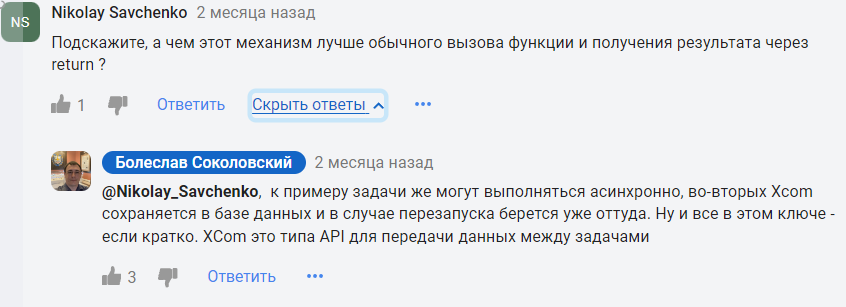

### Погружение в операторы. Sensor операторы

В Apache Airflow сенсоры (Sensors) используются для мониторинга определенных условий или событий и ожидания, пока эти условия не будут выполнены. Сенсоры позволяют вам создавать задачи, которые ожидают внешние события или изменения состояний, прежде чем продолжить выполнение DAG. Вот некоторые примеры сенсорных операторов в Airflow:

1. `ExternalTaskSensor`: Этот сенсор ожидает завершения определенной задачи (внешней задачи) в другом DAG. Вот пример использования `ExternalTaskSensor`:

In [ ]:
from airflow import DAG
from airflow.operators.dummy_operator import DummyOperator
from airflow.operators.sensors import ExternalTaskSensor
from datetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2023, 1, 1)) as dag:
    task1 = DummyOperator(task_id='task1')

    task2 = ExternalTaskSensor(task_id='wait_for_task1', external_dag_id='other_dag', external_task_id='task1')

    task1 >> task2


В этом примере у нас есть две задачи: `task1` и `wait_for_task1`. Задача `wait_for_task1` является сенсором и ожидает завершения задачи `task1` в другом даге с идентификатором `'other_dag'`. Когда `task1` в другом даге завершится, `wait_for_task1` продолжит выполнение.

2. `FileSensor`: Этот сенсор ожидает появление определенного файла на файловой системе. Вот пример использования `FileSensor`:




In [ ]:
from airflow import DAG
from airflow.operators.sensors import FileSensor

from datetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2023, 1, 1)) as dag:
  wait_for_file = FileSensor(
      task_id='wait_for_file',
      filepath='/path/to/my/file.txt'
  )


В этом примере у нас есть задача `wait_for_file`, которая ожидает появление файла `/path/to/my/file.txt` на файловой системе. Когда файл будет обнаружен, задача `wait_for_file` продолжит выполнение.



3. `HttpSensor`: Этот сенсор выполняет `HTTP-запрос` и ожидает успешный ответ от сервера. Вот пример использования `HttpSensor`:



In [ ]:
from airflow import DAG
from airflow.operators.sensors import HttpSensor

from datetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2023, 1, 1)) as dag:
    wait_for_api = HttpSensor(
        task_id='wait_for_api',
        http_conn_id='my_http_conn',
        endpoint='/api/health'
    )


В этом примере у нас есть задача `wait_for_api`, которая выполняет HTTP-запрос на эндпоинт `/api/health` с использованием соединения с идентификатором `'my_http_conn'`. Сенсор ожидает успешный ответ от сервера (код ответа 2xx). Когда успешный ответ будет получен, задача `wait_for_api` продолжит выполнение.



### Jinja templating


Jinja templating широко используется в Apache Airflow для создания динамических задач, определения параметров, форматирования строк и других операций в рамках дагов и операторов. В Airflow Jinja templating позволяет вам вставлять переменные и выражения в определенные атрибуты и параметры задач во время выполнения.

Вот некоторые примеры использования Jinja templating в Apache Airflow:



1. Вставка переменных в параметры задач: Вы можете использовать Jinja templating, чтобы вставить значения переменных или XCom данных в параметры задач:



In [ ]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
fromdatetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2023,1,1)) as dag:
  my_variable = 'Hello, Airflow!'
  task= BashOperator(task_id='my_task', bash_command='echo "{{ var.value.my_variable }}"')


В этом примере мы определяем переменную `my_variable` со значением `'Hello, Airflow!'`. Затем мы используем Jinja templating, обернув переменную в двойные фигурные скобки `{{ }}`, чтобы вставить ее значение в параметр `bash_command` задачи.



2. Использование функций и выражений: Jinja templating также позволяет использовать функции и выражения внутри шаблонов. Например, вы можете использовать функцию `ds_add()` для добавления дат в параметры задач:



In [ ]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_date=datetime(2023,1,1)) as dag:
  task = BashOperator(
      task_id=my_task,
      bash_command='echo "Today is {{ ds }}"'
  )

В этом примере мы используем `{{ ds }}`, чтобы вставить текущую дату в параметр bash_command задачи с помощью функции `ds_add()`.



3. Использование контекста выполнения: Airflow предоставляет контекст выполнения задачи, который можно использовать в Jinja templating для получения доступа к различным свойствам и данным. Например, вы можете использовать контекст для получения значения XCom данных:



In [ ]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import datetime

with DAG('my_dag', schedule_interval='@daily', start_datetime=datetime(2023,1,1)) as dag:
  task1 = BashOperator(task_id='task1', bash_command='echo "Hello, Airflow!"')
  task2 = BashOperator(
      task_id='task2',
      bash_command='echo "{{ ti.xcom_pull(task_ids=\'task1\'\) }}"'
  )

  task1 >> task2

### Как реально разворачивать airflow на практике (используют SparkSubmit и SparkServer)

А дело все в том, что на текущий момент мы сделали удаленный локальный запуск(с локальной машины через докер). Давайте разберемся подробнее.

1. Есть докер контейнер. Мы туда положили AIrflow.

2. Docker контейнер также содержит локальный спарк, который мы установили в Docker File.

3. Именно к нему и подключается Airflow и забирает ресурсы по факту у самого себя (то есть от общего количества ресурсов в контейнере), а докер уже забирает ресурсы нашего компьютера. Такая вот матрешка))

4. Но зато оно работает )

В реальности так никто конечно не делает. Используют оператор SparkSumbit, который смотрит на кластер Spark Server и уже туда отправляется наша задача. Можно ли рядом сделать Spark Server и отправлять туда задачи через этот оператор? Можно. Но у нас пока нет столько памяти на компьютере. Выглядеть будет ориентировочно вот так, но на практике пока не покажем.



In [ ]:
from airflow import DAG
from airflow.providers.apache.spark.operators.spark_submit import SparkSubmitOperator
from datetime import datetime

with DAG(
    dag_id='spark_submit_example',
    start_date=datetime(2023, 10, 1),
    schedule_interval='@daily',
    catchup=False,
) as dag:

    submit_spark_job = SparkSubmitOperator(
        task_id='run_spark_job',
        application='/opt/airflow/dags/spark_job.py',  # Путь к Spark приложению
        conn_id='spark_default',  # Подключение к Spark
        conf={
            "spark.master": "spark://spark-master:7077",
            "spark.executor.memory": "2g"
        },
        jars='/opt/airflow/jars/some-jar-file.jar',
        total_executor_cores=2,
        executor_cores=2,
        executor_memory="2g",
        driver_memory="1g",
        verbose=True
    )

    submit_spark_job


Таким образом мы не нагружаем Airflow вычислениями, так как они вынесены в Spark Server, который в свою очередь содержит Spark Master и Spark Workers.

